# <font style = "color:rgb(50,120,229)"> Coin Detection </font>

This was done as part of the OpenCV Computer Vision course taught by Satya Mallick

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

In [158]:
import cv2
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
import numpy as np
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Text(0.5, 1.0, 'Original Image')

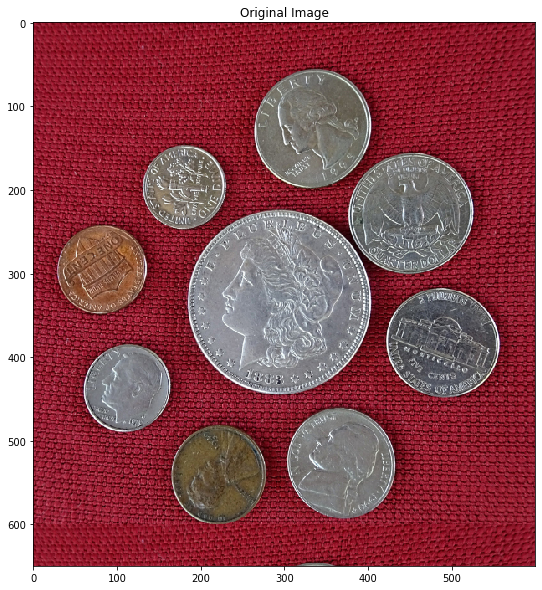

In [159]:
imagePath = "images/CoinsA.png"

image = cv2.imread(imagePath)
###
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")

## <font style = "color:rgb(50,120,229)">Step 2.1: Convert Image to Grayscale</font>

In [160]:
# Convert image to grayscale
if(len(image.shape) > 2):
    imageGray = cv2.cvtColor(imageCopy, cv2.COLOR_BGR2GRAY);

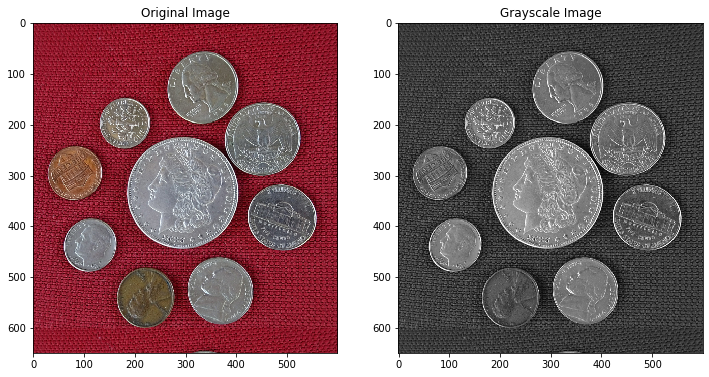

In [161]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(122)
plt.imshow(imageGray);
plt.title("Grayscale Image");

## <font style = "color:rgb(50,120,229)">Step 2.2: Split Image into R,G,B Channels</font>

In [162]:
# Split cell into channels
# Store them in variables imageB, imageG, imageR
imageB = image[:,:,0].copy()
imageG = image[:,:,1].copy()
imageR = image[:,:,2].copy()
###


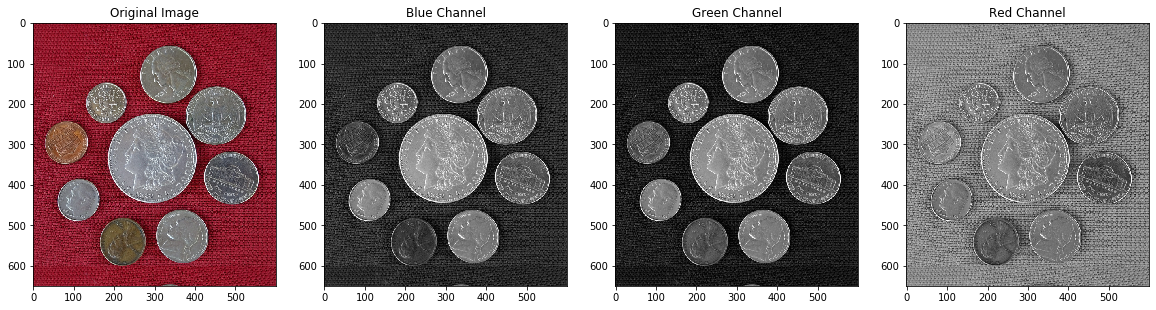

In [163]:
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(142)
plt.imshow(imageB);
plt.title("Blue Channel")
plt.subplot(143)
plt.imshow(imageG);
plt.title("Green Channel")
plt.subplot(144)
plt.imshow(imageR);
plt.title("Red Channel");

## <font style = "color:rgb(50,120,229)">Step 3.1: Perform Thresholding</font>

In [164]:
ret,im = cv2.threshold(imageG,50,255,cv2.THRESH_BINARY)
ret2,im2 = cv2.threshold(imageGray,50,255,cv2.THRESH_BINARY)
ret3,im3 = cv2.threshold(imageG,75,255,cv2.THRESH_BINARY)
ret4,im4 = cv2.threshold(imageGray,75,255,cv2.THRESH_BINARY)

# Binary seems to work the best of thresholding methods
# Green channel has more distinct values so it is better for thresholding

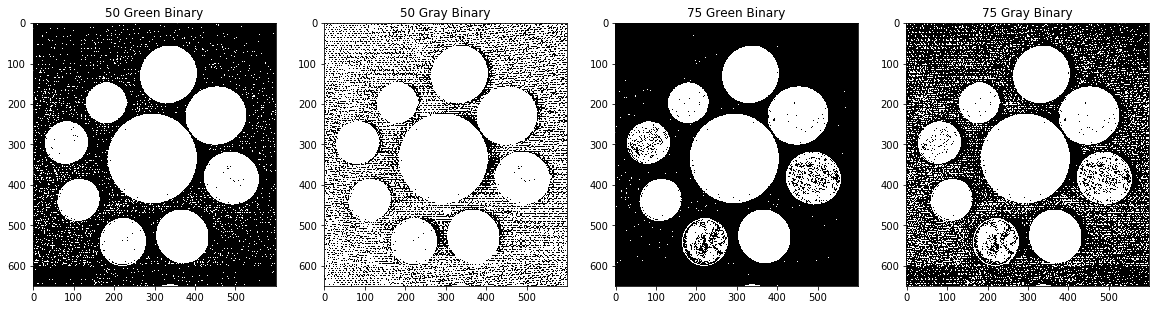

In [165]:
# Display the thresholded image
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(im);
plt.title("50 Green Binary")
plt.subplot(142)
plt.imshow(im2);
plt.title("50 Gray Binary")
plt.subplot(143)
plt.imshow(im3);
plt.title("75 Green Binary")
plt.subplot(144)
plt.imshow(im4);
plt.title("75 Gray Binary");
##

## <font style = "color:rgb(50,120,229)">Step 3.2: Perform morphological operations</font>

In [166]:
kSize = (3,3)
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize)
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS, kSize)

kSize2 = (5,5)
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSize2)
kernel4 = cv2.getStructuringElement(cv2.MORPH_CROSS, kSize2)

openIm1 = cv2.morphologyEx(im, cv2.MORPH_OPEN, kernel1, iterations = 2)
openIm2 = cv2.morphologyEx(im, cv2.MORPH_OPEN, kernel2, iterations = 2)
openIm3 = cv2.morphologyEx(im, cv2.MORPH_OPEN, kernel3, iterations = 2)
openIm4 = cv2.morphologyEx(im, cv2.MORPH_OPEN, kernel4, iterations = 2)


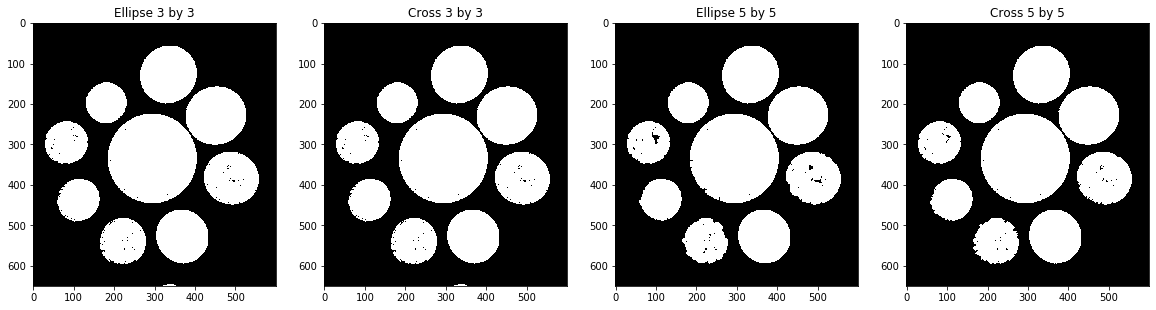

In [167]:
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(openIm1);
plt.title("Ellipse 3 by 3")
plt.subplot(142)
plt.imshow(openIm2);
plt.title("Cross 3 by 3")
plt.subplot(143)
plt.imshow(openIm3);
plt.title("Ellipse 5 by 5")
plt.subplot(144)
plt.imshow(openIm4);
plt.title("Cross 5 by 5");
###

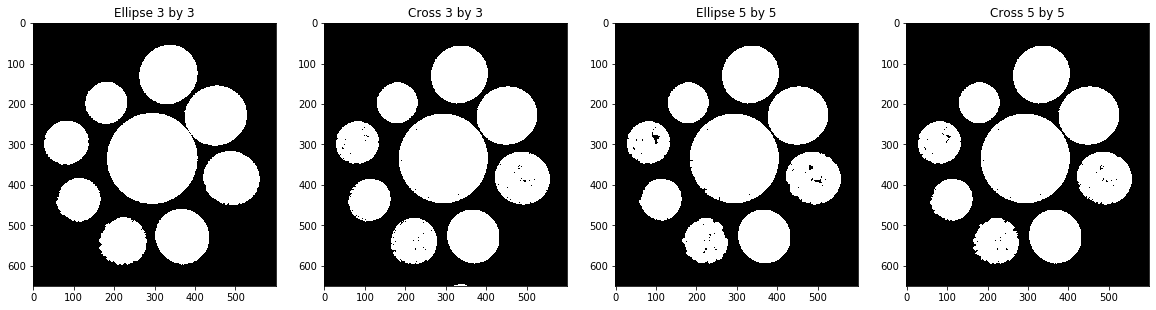

In [168]:
dilatedImg1 = cv2.dilate(openIm4,kernel1,iterations = 2)
dilatedImg2 = cv2.dilate(openIm4,kernel4,iterations = 2)
dilatedImg3 = cv2.dilate(openIm4,kernel1,iterations = 10)
dilatedImg4 = cv2.dilate(openIm4,kernel4,iterations = 10)
###
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(dilatedImg1);
plt.title("Ellipse 3 by 3")
plt.subplot(142)
plt.imshow(openIm2);
plt.title("Cross 3 by 3")
plt.subplot(143)
plt.imshow(openIm3);
plt.title("Ellipse 5 by 5")
plt.subplot(144)
plt.imshow(openIm4);
plt.title("Cross 5 by 5");
###


## <font style = "color:rgb(50,120,229)">Step 4.1: Create SimpleBlobDetector</font>

In [169]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 255

params.minDistBetweenBlobs = 1

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.5

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.5

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.5

# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

## <font style = "color:rgb(50,120,229)">Step 4.2: Detect Coins</font>

In [170]:
# Detect blobs
keypoints = detector.detect(dilatedImg1)


# Print number of coins detected
print(len(keypoints))

9


## <font style = "color:rgb(50,120,229)">Step 4.3: Display the detected coins on original image</font>

In [171]:
dispImage = image.copy()
dispImage = cv2.cvtColor(dispImage, cv2.COLOR_BGR2RGB);
for i in range(len(keypoints)):
    cv2.circle(dispImage, (int(keypoints[i].pt[0]),int(keypoints[i].pt[1])), 10, 255, -1)
    cv2.putText(dispImage, "Keypoint" + str(i+1), (int(keypoints[i].pt[0]) - 60,int(keypoints[i].pt[1]) - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
###


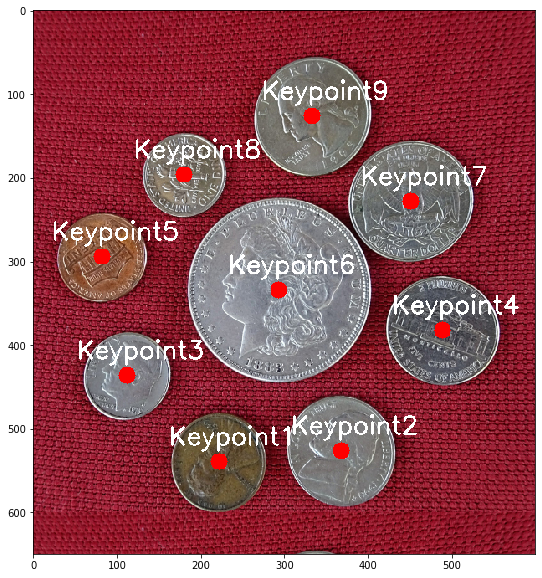

In [172]:
# Display the final image

plt.imshow(dispImage);

## <font style = "color:rgb(50,120,229)">Step 4.4: Perform Connected Component Analysis</font>

In [173]:
def displayConnectedComponents(im):
    imLabels = im
    # The following line finds the min and max pixel values
    # and their locations in an image.
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(imLabels)
    # Normalize the image so the min value is 0 and max value is 255.
    imLabels = 255 * (imLabels - minVal)/(maxVal-minVal)
    # Convert image to 8-bits unsigned type
    imLabels = np.uint8(imLabels)
    # Apply a color map
    imColorMap = cv2.applyColorMap(imLabels, cv2.COLORMAP_JET)
    # Display colormapped labels
    plt.imshow(imColorMap[:,:,::-1])

In [174]:
# Find connected components
ret, labels = cv2.connectedComponents(dilatedImg1)

# Print number of connected components detected
# 9 coins, 1 background
print(ret)

10


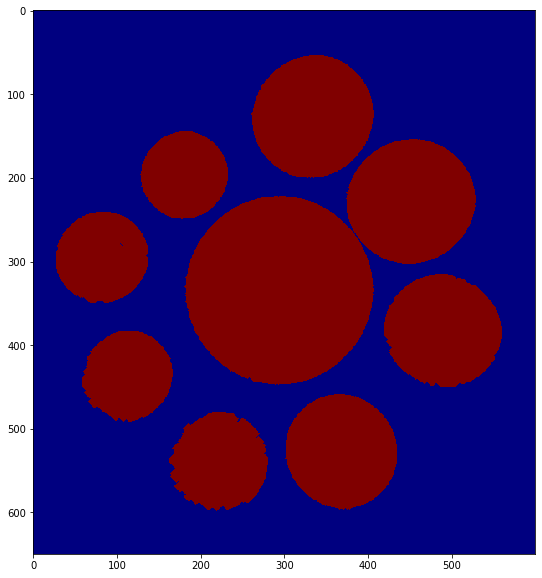

In [175]:
displayConnectedComponents(dilatedImg1)

## <font style = "color:rgb(50,120,229)">Step 4.5: Detect coins using Contour Detection</font>

In [176]:
# Find all contours in the image
bImg = dilatedImg1.copy()

contours, hierarchy = cv2.findContours(bImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Print the number of contours found
print(len(hierarchy[0]))

18


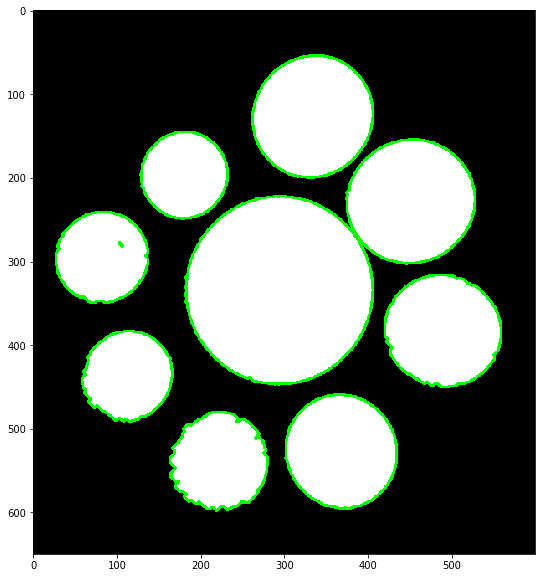

In [177]:
# Draw all contours
bImg = cv2.cvtColor(bImg, cv2.COLOR_GRAY2BGR)
bImg = cv2.drawContours(bImg, contours, -1, (0, 255, 0), 2)
plt.imshow(bImg)


In [178]:
# Need to remove the inner contours
h_outer = [item for item in hierarchy[0] if item[3] == -1]
# print(hierarchy)
print(h_outer)
# print(len(h_outer))

[array([ 6, -1,  1, -1], dtype=int32), array([ 7,  0, -1, -1], dtype=int32), array([ 8,  6, -1, -1], dtype=int32), array([ 9,  7, -1, -1], dtype=int32), array([14,  8, 10, -1], dtype=int32), array([15,  9, -1, -1], dtype=int32), array([16, 14, -1, -1], dtype=int32), array([17, 15, -1, -1], dtype=int32), array([-1, 16, -1, -1], dtype=int32)]


9


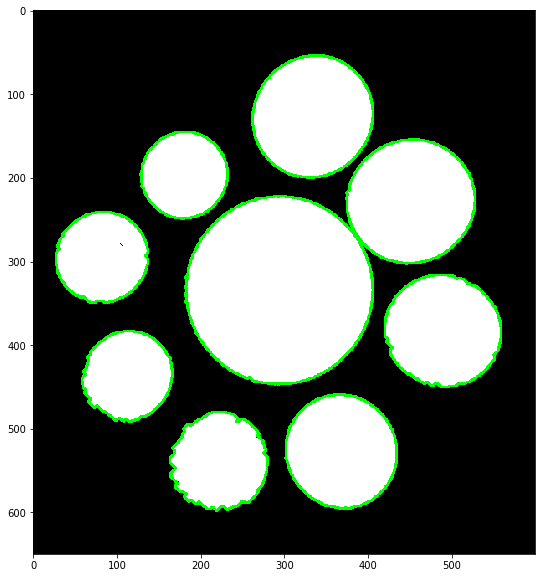

In [179]:
# Remove and plot others
bImg2 = dilatedImg1.copy()
contours, hierarchy = cv2.findContours(bImg2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
bImg2 = cv2.cvtColor(bImg2, cv2.COLOR_GRAY2BGR)
new_contours = [contours[i] for i in range(len(contours)) if hierarchy[0,i,3] == -1]
bImg2 = cv2.drawContours(bImg2, new_contours, -1, (0, 255, 0), 2)
print(len(new_contours))
plt.imshow(bImg2)

###

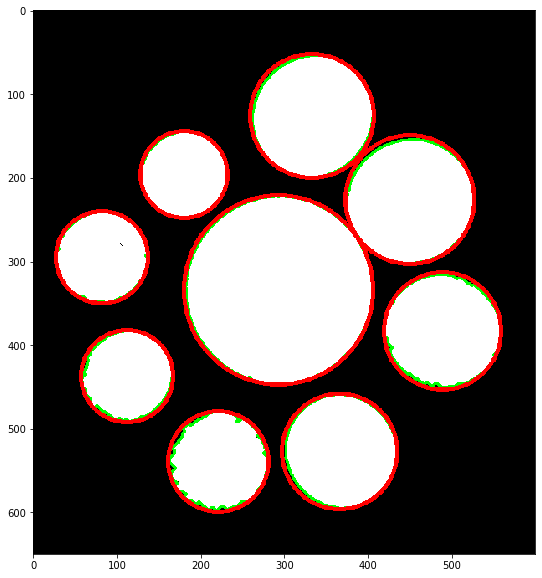

In [180]:
# Fit circles on coins
for i in new_contours:
    center, radius = cv2.minEnclosingCircle(i)
    cv2.circle(bImg2, (int(center[0]),int(center[1])), int(radius), 255, 3)
###
plt.imshow(bImg2)

# <font style = "color:rgb(50,120,229)">Example 2</font>

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

Text(0.5, 1.0, 'Original Image')

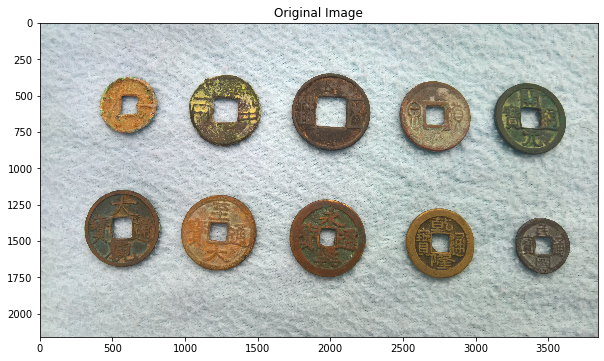

In [181]:
# Image path
imagePath = "images/CoinsB.png"
# Read image
# Store it in variable image
###
image2 = cv2.imread(imagePath)
###
plt.imshow(image2[:,:,::-1]);
plt.title("Original Image")

## <font style = "color:rgb(50,120,229)">Step 2.1: Convert Image to Grayscale</font>

In [182]:
# Convert to grayscale
image2Copy = image2.copy()
if(len(image2.shape) > 2):
    image2Gray = cv2.cvtColor(image2Copy, cv2.COLOR_BGR2GRAY);

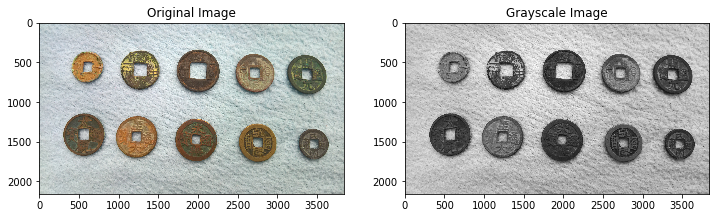

In [183]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image2[:,:,::-1]);
plt.title("Original Image")
plt.subplot(122)
plt.imshow(image2Gray);
plt.title("Grayscale Image");

## <font style = "color:rgb(50,120,229)">Step 2.2: Split Image into R,G,B Channels</font>

In [184]:
# Split cell into channels
# Variables are: imageB, imageG, imageR
image2B = image2[:,:,0].copy()
image2G = image2[:,:,1].copy()
image2R = image2[:,:,2].copy()

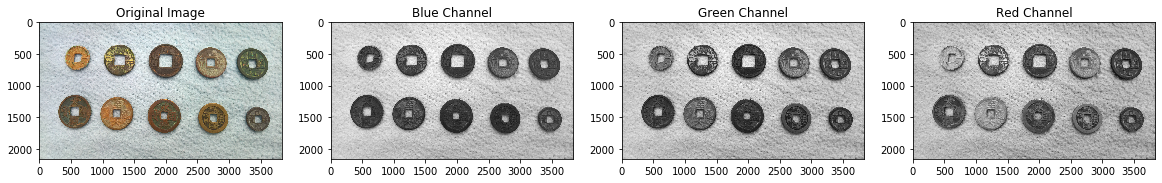

In [185]:
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(image2[:,:,::-1]);
plt.title("Original Image")
plt.subplot(142)
plt.imshow(image2B);
plt.title("Blue Channel")
plt.subplot(143)
plt.imshow(image2G);
plt.title("Green Channel")
plt.subplot(144)
plt.imshow(image2R);
plt.title("Red Channel");

## <font style = "color:rgb(50,120,229)">Step 3.1: Perform Thresholding</font>

In [186]:
ret_A,im2_A = cv2.threshold(image2B,150,255,cv2.THRESH_BINARY)
ret2_B,im2_B = cv2.threshold(image2B,150,255,cv2.THRESH_BINARY)
ret3_C,im2_C = cv2.threshold(image2B,100,255,cv2.THRESH_BINARY)
ret4_D,im2_D = cv2.threshold(image2B,125,255,cv2.THRESH_BINARY)


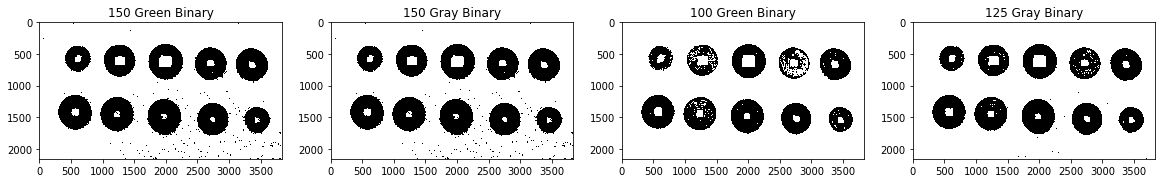

In [187]:
# Display image using matplotlib
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(im2_A);
plt.title("150 Green Binary")
plt.subplot(142)
plt.imshow(im2_B);
plt.title("150 Gray Binary")
plt.subplot(143)
plt.imshow(im2_C);
plt.title("100 Green Binary")
plt.subplot(144)
plt.imshow(im2_D);
plt.title("125 Gray Binary");

## <font style = "color:rgb(50,120,229)">Step 3.2: Perform morphological operations</font>

In [188]:
openIm2_A = cv2.morphologyEx(im2_D, cv2.MORPH_CLOSE, kernel1, iterations = 2)
openIm2_B = cv2.morphologyEx(im2_D, cv2.MORPH_CLOSE, kernel2, iterations = 2)
openIm2_C = cv2.morphologyEx(im2_D, cv2.MORPH_CLOSE, kernel3, iterations = 2)
openIm2_D = cv2.morphologyEx(im2_D, cv2.MORPH_CLOSE, kernel4, iterations = 2)

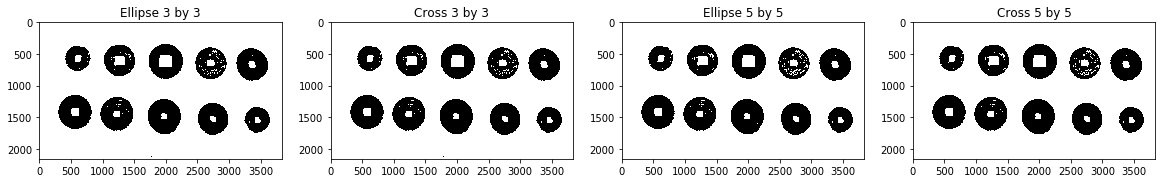

In [189]:
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(openIm2_A);
plt.title("Ellipse 3 by 3")
plt.subplot(142)
plt.imshow(openIm2_B);
plt.title("Cross 3 by 3")
plt.subplot(143)
plt.imshow(openIm2_C);
plt.title("Ellipse 5 by 5")
plt.subplot(144)
plt.imshow(openIm2_D);
plt.title("Cross 5 by 5");

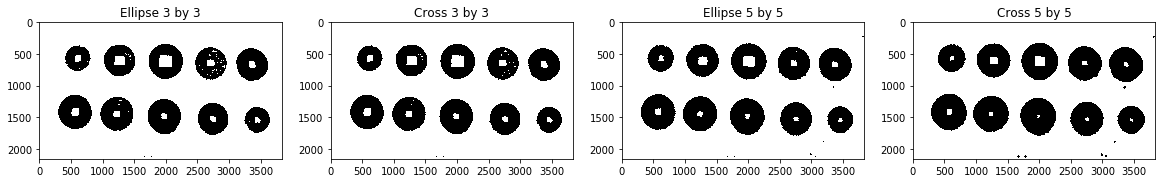

In [190]:
erodeImg2_A = cv2.erode(openIm2_A,kernel1,iterations = 1)
erodeImg2_B = cv2.erode(openIm2_A,kernel4,iterations = 1)
erodeImg2_C = cv2.erode(openIm2_A,kernel1,iterations = 10)
erodeImg2_D = cv2.erode(openIm2_A,kernel4,iterations = 10)
###
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(erodeImg2_A);
plt.title("Ellipse 3 by 3")
plt.subplot(142)
plt.imshow(erodeImg2_B);
plt.title("Cross 3 by 3")
plt.subplot(143)
plt.imshow(erodeImg2_C);
plt.title("Ellipse 5 by 5")
plt.subplot(144)
plt.imshow(erodeImg2_D);
plt.title("Cross 5 by 5");

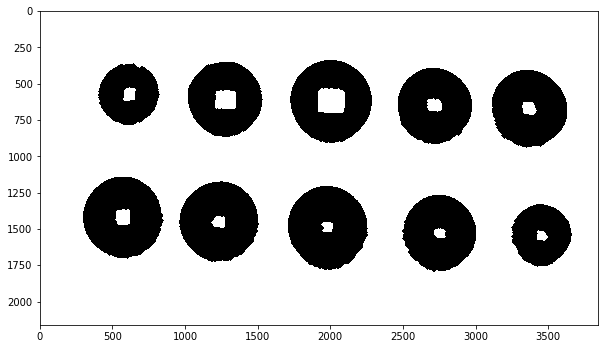

In [191]:
open2Im2_A = cv2.morphologyEx(erodeImg2_C, cv2.MORPH_CLOSE, kernel1, iterations = 20)
open2Im2_A = cv2.morphologyEx(open2Im2_A, cv2.MORPH_OPEN, kernel1, iterations = 8)
plt.imshow(open2Im2_A);

## <font style = "color:rgb(50,120,229)">Step 4.1: Create SimpleBlobDetector</font>

In [192]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 1

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.5

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.5

# Filter by Inertia
params.filterByInertia =False
params.minInertiaRatio = 0.5

In [193]:
# Create SimpleBlobDetector
detector2 = cv2.SimpleBlobDetector_create(params)

## <font style = "color:rgb(50,120,229)">Step 4.2: Detect Coins</font>

In [194]:
# Detect blobs
retval, detectImg2 = cv2.threshold(open2Im2_A, 200, 255, cv2.THRESH_BINARY_INV)
keypoints2 = detector2.detect(detectImg2)
keypoints2

[<KeyPoint 00000149062E0E10>,
 <KeyPoint 00000149062E0690>,
 <KeyPoint 00000149062E0FC0>,
 <KeyPoint 00000149062E0F30>,
 <KeyPoint 00000149062E0D80>,
 <KeyPoint 00000149062E0EA0>,
 <KeyPoint 00000149062E0990>,
 <KeyPoint 00000149062E0ED0>,
 <KeyPoint 00000149062E0DE0>,
 <KeyPoint 00000149062E0D50>]

## <font style = "color:rgb(50,120,229)">Step 4.3: Display the detected coins on original image</font>
You can extract the coordinates of the center and the diameter of a blob using **`k.pt`** and **`k.size`** where `k` is a keypoint.

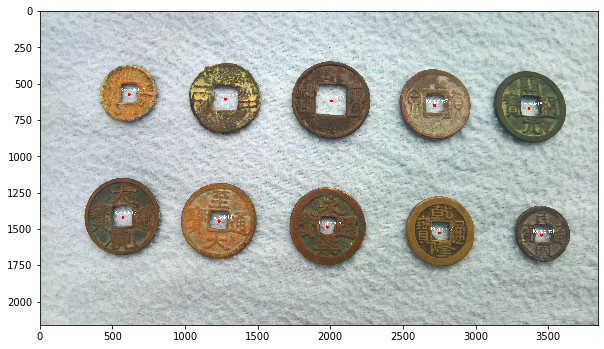

In [195]:
dispImage2 = image2.copy()
dispImage2 = cv2.cvtColor(dispImage2, cv2.COLOR_BGR2RGB);
for i in range(len(keypoints2)):
    cv2.circle(dispImage2, (int(keypoints2[i].pt[0]),int(keypoints2[i].pt[1])), 10, 255, -1)
    cv2.putText(dispImage2, "Keypoint" + str(i+1), (int(keypoints2[i].pt[0]) - 60,int(keypoints2[i].pt[1]) - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
###
plt.imshow(dispImage2)

## <font style = "color:rgb(50,120,229)">Step 4.4: Perform Connected Component Analysis</font>

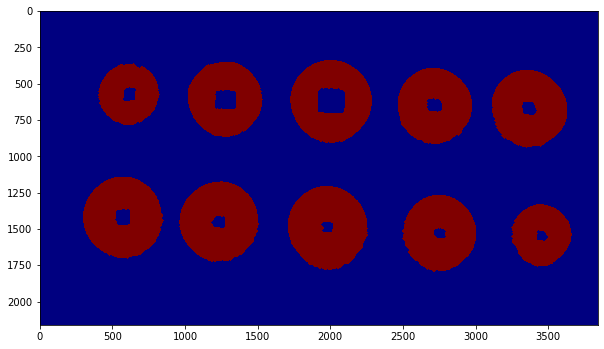

In [196]:
ret2, labels2 = cv2.connectedComponents(detectImg2)
displayConnectedComponents(detectImg2)

In [197]:
print(ret2)

11


## <font style = "color:rgb(50,120,229)">Step 4.5: Detect coins using Contour Detection</font>

In [198]:
# Find all contours in the image
bImg2_A = detectImg2.copy()

contours2, hierarchy2 = cv2.findContours(bImg2_A, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [199]:
# Print the number of contours found
print(len(hierarchy2[0]))

20


In [200]:
hierarchy2

array([[[ 2, -1,  1, -1],
        [-1, -1, -1,  0],
        [ 4,  0,  3, -1],
        [-1, -1, -1,  2],
        [ 6,  2,  5, -1],
        [-1, -1, -1,  4],
        [ 8,  4,  7, -1],
        [-1, -1, -1,  6],
        [10,  6,  9, -1],
        [-1, -1, -1,  8],
        [12,  8, 11, -1],
        [-1, -1, -1, 10],
        [14, 10, 13, -1],
        [-1, -1, -1, 12],
        [16, 12, 15, -1],
        [-1, -1, -1, 14],
        [18, 14, 17, -1],
        [-1, -1, -1, 16],
        [-1, 16, 19, -1],
        [-1, -1, -1, 18]]], dtype=int32)

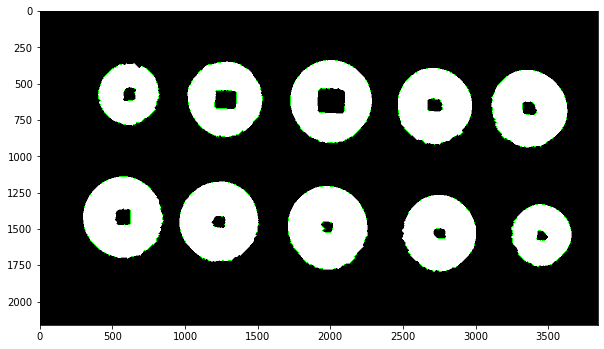

In [201]:
# Draw all contours
bImg2_A = cv2.cvtColor(bImg2_A, cv2.COLOR_GRAY2BGR)
bImg2_A = cv2.drawContours(bImg2_A, contours2, -1, (0, 255, 0), 2)
plt.imshow(bImg2_A)

10


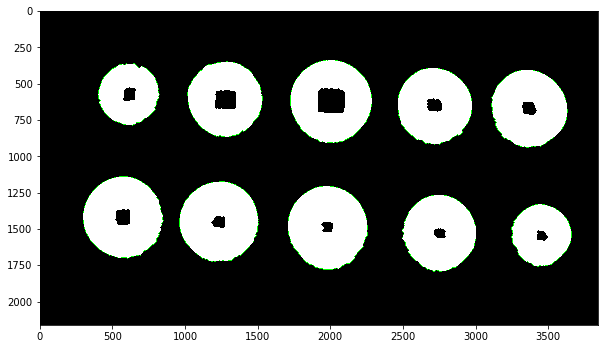

In [202]:
# Remove the inner contours
# Display the result

bImg2_B = detectImg2.copy()
contours2, hierarchy2 = cv2.findContours(bImg2_B, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
bImg2_B = cv2.cvtColor(bImg2_B, cv2.COLOR_GRAY2BGR)
new_contours2 = [contours2[i] for i in range(len(contours2)) if hierarchy2[0,i,3] == -1]
bImg2_B = cv2.drawContours(bImg2_B, new_contours2, -1, (0, 255, 0), 2)
print(len(new_contours2))
plt.imshow(bImg2_B)

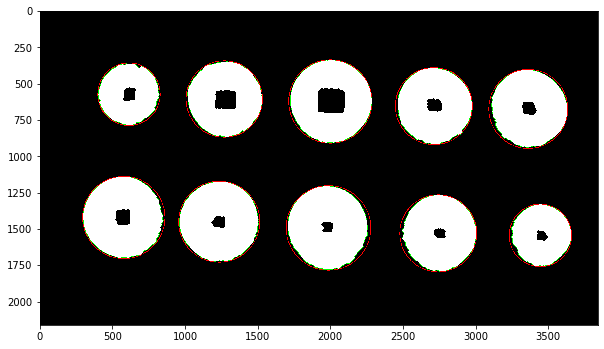

In [203]:
# Fit circles on coins
for i in new_contours2:
    center2, radius2 = cv2.minEnclosingCircle(i)
    cv2.circle(bImg2_B, (int(center2[0]),int(center2[1])), int(radius2), 255, 3)
###
plt.imshow(bImg2_B)